> Introdução à Ciência dos Dados \
> Ciência da Computação – UFV/Florestal


* **Nome:** %s
* **Matrícula:**  %d

# Aula Prática 09
## Aprendizado Supervisionado
**Objetivo:** Utilizar a biblioteca scikit-learn para treinar e testar modelos de aprendizado supervisionado \\
**Pré-requisitos:** Linguagem de programação Python, Linux, estatística \\
**Meta**: Ao final da prática, o aluno será capaz de preparar dados e criar modelos de classificação

In [ ]:
### NÃO REMOVA ESSA CÉLULA! ####
!pip --no-cache-dir install --upgrade learntools_dados_ufv

!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p9/weatherHistory.csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from learntools_dados_ufv.core import binder; binder.bind(globals())
from learntools_dados_ufv.ccf425.pratica_9 import *

print("Setup complete.")

------
## Roteiro

### Ler o conjunto de dados
O conjunto de dados que iremos utilizar é o **iris dataset**, que é um dataset clássico no treinamento em Inteligência Artificial. Os dados estão disponíveis diretamente na biblioteca `scikit-learn`.

In [ ]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns=np.append(iris['feature_names'], ['target']))

# Converte a coluna target para int
iris_df['target'] = iris_df['target'].astype('int64')

### Visualizar os dados

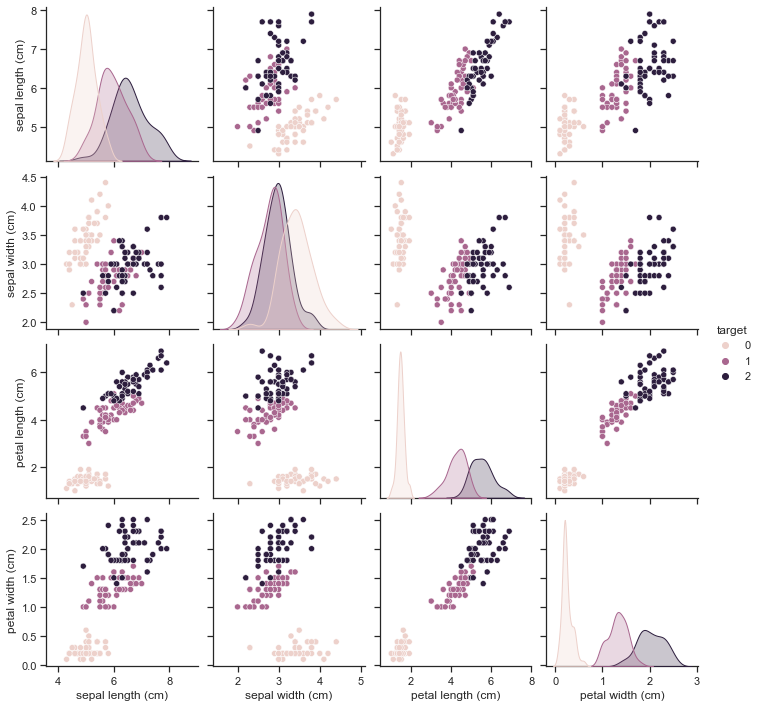

In [ ]:
sns.set(style='ticks')
sns.pairplot(iris_df, hue='target')
plt.show()

### Separar o conjunto de dados em treinamento e testes

In [ ]:
iris_df_X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
iris_df_Y = iris_df['target']

X_train, X_test, Y_train, Y_test = train_test_split(
    iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']],
    iris_df['target'],
    test_size=0.2,
    random_state=0
)

### Aplicar o KNN para treinar um modelo

Além disso, classificar os exemplos de testes

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

knn_Y_predicted = knn.predict(X_test)
knn_accuracy = np.sum(knn_Y_predicted == Y_test) / len(Y_test)

print('Acurácia: {:.2f}%'.format(100 * knn_accuracy))

Acurácia: 96.67%


### Aplicar o SVM para treinar um modelo

... e classificar os exemplos de testes...

In [ ]:
from sklearn import svm

svm = svm.SVC(kernel='linear', probability=True)
svm.fit(X_train, Y_train)

svm_Y_predicted = svm.predict(X_test)
svm_accuracy = np.sum(svm_Y_predicted == Y_test) / len(Y_test)

print('Acurácia: {:.2f}%'.format(100 * svm_accuracy))

Acurácia: 100.00%


#### Calcular a precisão e revogação...

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

print("KNN (precisão, revogação, fscore)")
precision_recall_fscore_support(Y_test, knn_Y_predicted, average=None)

KNN (precisão, revogação, fscore)


(array([1.        , 1.        , 0.85714286]),
 array([1.        , 0.92307692, 1.        ]),
 array([1.        , 0.96      , 0.92307692]),
 array([11, 13,  6]))

In [ ]:
print("SVM (precisão, revogação, fscore)")
precision_recall_fscore_support(Y_test, svm_Y_predicted, average=None)

SVM (precisão, revogação, fscore)


(array([1., 1., 1.]),
 array([1., 1., 1.]),
 array([1., 1., 1.]),
 array([11, 13,  6]))

#### Calcular a Validação Cruzada...

In [ ]:
from sklearn.model_selection import cross_val_score


scores_knn = cross_val_score(knn, iris_df_X, iris_df_Y, cv=5)
print('Acurácia KNN: {:.2f} (± {:.2f})'.format(scores_knn.mean(), scores_knn.std() * 2))

scores_svm = cross_val_score(svm, iris_df_X, iris_df_Y, cv=5)
print('Acurácia SVM: {:.2f} (± {:.2f})'.format(scores_svm.mean(), scores_svm.std() * 2))

Acurácia KNN: 0.97 (± 0.05)
Acurácia SVM: 0.98 (± 0.03)


----
# Atividades

Utilizar o conjunto de dados weatherHistory.csv, que contém o histórico de variáveis relacionadas ao clima da cidade de Szede, Hungria, entre 2006 e 2016.

Utilize técnicas de aprendizado de máquina supervisionado para criar modelos para prever o tipo de precipitação (Precip Type) de acordo com outras variáveis. Teste pelo menos três algoritmos e responda:

## 1. Leia o arquivo `weatherHistory.csv`
Armazene-os nas variável `df`. 

Chame a função `q1.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q1.hint()`

In [ ]:
# q1.hint()

df = ...

q1.check()

## 2. Divida o conjunto de treinamento (70% das instâncias) e de teste (30% das instâncias)

Utilize uma amostragem aleatória (pesquise um parâmetro que realize isso).

Armazene os dados nas seguintes variáveis:
- `X_train` - Conjunto de atributos de entrada para treinamento
- `Y_train` - Conjunto de saída para treinamento
- `X_test` - Conjunto de atributos de entrada para teste
- `Y_test` - Conjunto de saída para teste

Chame a função `q2.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q2.hint()`

In [ ]:
# q2.hint()

X_train, ... = ...

q2.check()

## 3. Faça uma análise simples da distribuição dos dados de Precipitação
Analise se os dados seguem uma distribuição normal ou não, se é contínuo ou não, etc. Talvez com 1 ou 2 gráficos você consiga tirar toda a informação necessária.

Tente extrair as informações fundamentais para **escolher um modelo de aprendizado de máquina supervisionado** ideal.

Essa questão não possui verificação automática mas você pode pedir dicas com `q3.hint()`

In [ ]:
# Resposta da 3

q3.hint()

## 4. Utilize técnicas de aprendizado de máquina **supervisionado** para prever o tipo de precipitação
Utilize técnicas de aprendizado de máquina supervisionado para criar modelos para prever o tipo de precipitação (Precip Type) de acordo com outras variáveis. 

Analise o conjunto de dadoTeste pelo menos três algoritmos. Escolha os que você julgar mais adequado e justifique porque o escolheu (uma frase curta, não precisa se aprofundar... tente aplicar os conhecimentos teóricos sobre cada modelo)


É esperado que você preencha uma célula de markdown descrevendo o método e o porquê o escolheu, e uma célula de código que faça o treinamento (`fit`) do modelo.

Essa questão não possui verificação automática mas você pode pedir dicas com `q4.hint()`

In [ ]:
q4.hint()

### Resposta da 4: - Modelo 1

**Modelo:** {{ ESCREVA AQUI! }}

**Justificativa:** {{ ESCREVA AQUI! }}

In [ ]:
# Resposta da 4: - Modelo 1
# Faça o modelo do primeiro modelo da 4. aqui!

...

### Resposta da 4: - Modelo 2

**Modelo:** {{ ESCREVA AQUI! }}

**Justificativa:** {{ ESCREVA AQUI! }}

In [ ]:
# Resposta da 4: - Modelo 2
# Faça o modelo do segundo modelo da 4. aqui!

...

### Resposta da 4: - Modelo 3

**Modelo:** {{ ESCREVA AQUI! }}

**Justificativa:** {{ ESCREVA AQUI! }}

In [ ]:
# Resposta da 4: - Modelo 3
# Faça o modelo do terceiro modelo da 4. aqui!

...

## 5. Calcule estatísticas para cada algoritmo escolhido
Calcule a acurácia, precisão e revocação para cada rótulo (tipo de precipitação) para cada algoritmo testado.

É esperado que você preencha a tabela markdown abaixo com os resultados.

Essa questão não possui verificação automática mas você pode pedir dicas com `q5.hint()`

### Algoritmo 1

**Nome:** {{ Insira o nome do algoritmo 1 Testado }}

**Resultados:**

| Label                  	| Acurácia 	| Precisão 	| Revogação 	|
|------------------------	|----------	|----------	|-----------	|
| {{Tipo Precip Type 1}} 	|          	|          	|           	|
| {{Tipo Precip Type 2}} 	|          	|          	|           	|
| {{Tipo Precip Type N}} 	|          	|          	|           	|

In [ ]:
# Insira o código para calcular estatísticas do seu modelo/algoritmo 1. 

q5.hint()

### Algoritmo 2

**Nome:** {{ Insira o nome do algoritmo 2 Testado }}

**Resultados:**

| Label                  	| Acurácia 	| Precisão 	| Revogação 	|
|------------------------	|----------	|----------	|-----------	|
| {{Tipo Precip Type 1}} 	|          	|          	|           	|
| {{Tipo Precip Type 2}} 	|          	|          	|           	|
| {{Tipo Precip Type N}} 	|          	|          	|           	|

In [ ]:
# Insira o código para calcular estatísticas do seu modelo/algoritmo 2. 

q5.hint()

### Algoritmo 3

**Nome:** {{ Insira o nome do algoritmo 3 Testado }}

**Resultados:**

| Label                  	| Acurácia 	| Precisão 	| Revogação 	|
|------------------------	|----------	|----------	|-----------	|
| {{Tipo Precip Type 1}} 	|          	|          	|           	|
| {{Tipo Precip Type 2}} 	|          	|          	|           	|
| {{Tipo Precip Type N}} 	|          	|          	|           	|

In [ ]:
# Insira o código para calcular estatísticas do seu modelo/algoritmo 3. 

q5.hint()

## 6.  É possível melhorar o algoritmo se forem selecionados alguns atributos em particular, ao invés de utilizar todos?
Descreva sua resposta para cada um dos algoritmos. Utilize evidências empíricas, se achar conveniente.

Essa questão não possui verificação automática mas você pode pedir dicas com `q6.hint()`

{{ Resposta da 6. }}

In [ ]:
q6.hint()

updated_models = ...

## 7. Você percebeu alguma diferença no tempo de processamento dos algoritmos? Qual foi o mais lento? E qual foi o mais rápido?
Descreva sua resposta para cada um dos algoritmos. Utilize evidências empíricas, se achar conveniente.

Essa questão não possui verificação automática mas você pode pedir dicas com `q7.hint()`

{{ Resposta da 7. }}

In [ ]:
q7.hint()

benchmark = ...

## 8. Mostre a matriz de confusão para os resultados.
Pesquise como fazer uma matriz de confusão. Descreva sua resposta para cada um dos algoritmos. Evidencie explicitamente o código utilizado, usando bibliotecas ou não.

Essa questão não possui verificação automática mas você pode pedir dicas com `q8.hint()`

{{ Resposta da 8. }}

In [ ]:
q8.hint()

confusion_matrix = ...